# Used Car Listing Price Prediction

---

## Table of Contents

- Overview
- Methodology
- Set up
    - [Import Library](#Import-Library)
- Data Loading
    - [Load Dataset](#Load-Dataset)
- Data Assessment
- Data Cleaning
- Data Preprocessing
- Exploratory Data Analysis

## Overview

### Introduction

In [ ]:
# TODO: Add project Intro

### Dataset
- Dataset can be found [here](https://www.kaggle.com/datasets/3ea0a6a45dbd4713a8759988845f1a58038036d84515ded58f65a2ff2bd32e00/data)

## Set Up

### Install Library

In [1]:
!pip install unidecode
!pip install geopy

### Import Library

In [4]:
# Import basic library
import os
import math
import time
import sys
from typing import Optional

# Import data science tools
import numpy as np
import pandas as pd

# Import data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import predictive modelling modules
import statsmodels.api as sm

# Additional Library
import geopy
from geopy.geocoders import Nominatim
from unidecode import unidecode



### Global Constant

In [5]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

## Functions

### Helper Functions (Print Info)

In [6]:
# Helper Functions to print df info and statement
import pandas as pd

def print_num_row(df: pd.DataFrame) -> None:
    """ TODO:
    Description
    -----
    
    Args
    -----
    
    Returns
    -----
    
    
    """
    print(f"The dataframe has {df.shape[0]} rows of record now.")
    return
    

def print_num_col(df: pd.DataFrame) -> None:
    """ TODO:
    Description
    -----
    
    Args
    -----
    
    Returns
    -----
    
    
    """
    print(f"The dataframe has {df.shape[1]} columns.")
    return
        
def print_dim(df: pd.DataFrame) -> None:
    """ TODO:
    Description
    -----
    
    Args
    -----
    
    Returns
    -----
    
    
    """
    print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in this dataframe.")
    return

def print_null_pct(df: pd.DataFrame,cols:list = []) -> None:
    """ TODO:
    Description
    -----
    
    Args
    -----
    
    Returns
    -----
    
    
    """
    total_row = df.shape[0]
    if len(cols) == 0:
        null_count = df.isnull().sum()
        null_pct = null_count / total_row * 100
        print(null_pct.round(2).astype(str)+"%")
    else:
        assert set(cols).issubset(df.columns)
        null_count = df[cols].isnull().sum()
        null_pct = null_count / total_row * 100

        print("=== Null Count Precentage ===")
        for col in cols:
            print(f"Column {col}: {round(null_pct[col],4)}%")
    return

def print_null_count(df: pd.DataFrame,cols:list = []) -> None:
    """ TODO:
    Description
    -----
    
    Args
    -----
    
    Returns
    -----
    
    
    """
    if len(cols) == 0:
        null_count = df.isnull().sum()
        print(null_count)
    else:
        assert set(cols).issubset(df.columns)
        null_count = df[cols].isnull().sum()
        
        print("=== Null Count ===")
        for col in cols:
            print(f"Column {col}: {null_count[col]}")
    return 

def print_duplicated_count(df: pd.DataFrame) -> None:
    """ TODO:
    Description
    -----
    
    Args
    -----
    
    Returns
    -----
    
    
    """
    print(f"There are {df.duplicated().sum()} duplicated rows")
    return

### Helper Functions (Edit Dataframe)

In [7]:
def drop_cols_if_exist(df: pd.DataFrame,cols_to_drop:list) -> pd.DataFrame:
    """ TODO:
    Description
    -----
    
    Args
    -----
    
    Returns
    -----
    
    
    """
    intersect_cols = set(cols_to_drop).intersection(df.columns)
    df.drop(columns=intersect_cols,inplace=True)
    print(f"Successfully dropped columns: {intersect_cols}")
    return df

        
    

### General Helper Functions

In [8]:
# Other Helper Functions
def flatten_list(l:list) -> list:
    """ TODO:
    Description
    -----
    
    Args
    -----
    
    Returns
    -----
    
    
    """
    return [item for sublist in l for item in sublist]

## Data Loading

### Data Loading Functions

In [ ]:
# Helper Function to load dataset
CSV_COL_DTYPE = {
    "id":str,
    "vin":str,
    "price":float,
    "miles":float,
    "stock_no":str,
    "year":float,
    "make":str,
    "model":str,
    "trim":str,
    "body_type":str,
    "vehicle_type":str,
    "drivetrain":str,
    "transmission":str,
    "fuel_type":str,
    "engine_size":float,
    "engine_block":str,
    "seller_name":str,
    "street":str,
    "city":str,
    "state":str,
    "zip":str,
}

PARQUET_COL_DTYPE = CSV_COL_DTYPE.copy()
CA_DATA_PATH = "data/ca-dealers-used.csv"
US_DATA_PATH = "data/us-dealers-used.csv"
PARQUET_DATA_PATH = "data/combined-data.parquet"

def load_ca_dataset() -> Optional[pd.DataFrame]:
    """ TODO:
    Description
    -----
    
    Args
    -----
    
    Returns
    -----
    
    
    """
    
    if os.path.isfile(CA_DATA_PATH):
        print("Reading Canada data...")
        return pd.read_csv(CA_DATA_PATH,
                           dtype = CSV_COL_DTYPE)
    else:
        return 
    

def load_us_dataset() -> Optional[pd.DataFrame]:
    """ TODO:
    Description
    -----
    
    Args
    -----
    
    Returns
    -----
    
    
    """
    if os.path.isfile(US_DATA_PATH):
        print("Reading US data...")
        return pd.read_csv(US_DATA_PATH,
                           dtype = CSV_COL_DTYPE)
    else:
        return 


def load_combined_dataset() -> Optional[pd.DataFrame]:
    """ TODO:
    Description
    -----
    Read the combined dataset if available
    
    Args
    -----
    
    Returns
    -----
    
    
    """
    print("Reading combined dataset...")
    if os.path.isfile(PARQUET_DATA_PATH):
        df = pd.read_parquet(path = PARQUET_DATA_PATH,
                             columns = PARQUET_COL_DTYPE)
        
        print("Dataset Loaded!")
        return df
    else:
        # Print not found message
        print("Combined Dataset not found! Reload the original dataset.")
        
        # Loading original dataset
        ca_df = load_ca_dataset()
        assert ca_df is not None, f"No Canada dataset found!"
        us_df = load_us_dataset()
        assert us_df is not None, f"No US dataset found!"
        
        # Check if both dataset have the same set of column names
        assert (ca_df.columns == us_df.columns).all(), "There are difference between columns name in Canada and US dataset"
        
        # Combine both dataset
        print("Combining both dataset...")
        df = pd.concat([ca_df,us_df])
        
        # Save the data as parquet file
        df.to_parquet(path=PARQUET_DATA_PATH,
                      index = False)
    
        # Return the combined dataset in dataframe format
        print("Dataset Loaded!")
        return df
    

### Load Dataset

In [ ]:
df = load_combined_dataset()

### Have a look on the dataset

In [ ]:
df.head()

## Data Assessment

### Number of Rows and Columns

In [ ]:
print_dim(df)

### Data Type of each column

In [ ]:
df.dtypes

Note that there are quite a lot of columns (18 out of 22 columns) with categorical data.

### Null Value Checking

#### Null Value Count

In [ ]:
print_null_count(df)

There are some null value in our target variable `price`, we may need to drop those records.  
There are also some null value in other columns. We need to handle them later.  

Now let's check the null percentage in each column.

#### Null Value Percentage

In [ ]:
print_null_pct(df)

From the null value percentage table above, we can see that there are around 9% of data are missing with the `price`, which is our target variable. Fortunely, we have over 7 millions rows of record. We may remove those without the `price` data from our dataset.

For other columns, none of them have over 3% of missing data, which is acceptable in this case.  
We may need to handle the missing data in the later session.

### Duplicates Checking

Note that there are over 7 million records, it will take a bit longer time to run this cell.

In [ ]:
print_duplicated_count(df)

## Data Cleaning
In this section, we will clean our data by different techniques such as 
- Dropping rows & columns
- Target variable labelling
- Filling null values

### Remove records without target variable

As the records without `price` data will not be useful to our problem, we will drop them before any data cleaning and EDA.

In [ ]:
# Drop row that have null value in `price`
df.dropna(subset=["price"],inplace = True)

# Check how many rows left after dropping 
print_dim(df)

After dropping records with no `price` data, we have around 6.8 million records left. Now, let's go into the column with null value one-by-one.

### Convert target price as Price Range for classification task

#### Have a look on `price` statistics

In [ ]:
# Have a look on the price statistics
stats = df["price"].describe()
stats

The minimum value of `price` is 0, which is unreasonable. In this task, we assume all listing prices below $1000 are all unrealistic and non-sense. We will drop them out.

#### Remove records with unreasonable `price` 

In [ ]:
print(f"There are {(df['price'] < 1000).sum()} records with listing price below $1000")

In [ ]:
df.drop(df[df["price"] < 1000].index, inplace=True)

In [ ]:
# Check how many rows left after dropping 
print_dim(df)

#### Plot a histogram with `price` column 

In [ ]:
# Set up plot
plt.figure(figsize=(6,6))
# Plot
plt.hist(df["price"],bins=50)
# Plot title & axes
plt.title("Price Range Histogram")
plt.xlabel("Price Range")
plt.ylabel("Count")
# Show Plot
plt.show()

There are some extreme values on the right. Let's plot a box-whisker plot with log scale.

#### Plot a box-whisker plot with `price` column 

In [ ]:
# Set up plot
plt.figure(figsize=(15,4))
# Plot
box = plt.boxplot(df["price"],vert=False)
# Plot title & axes
plt.title("Listing Price Distribution")
plt.xlabel("Price")
plt.yticks([]) # Remove y axis tick
plt.xscale("log")
# Show Plot
plt.show()

Even with a log scale on x-axis, we can see that there are a lot of extreme value on the right, these are the outlier for the `price` column.

In [ ]:
upper_whisker = box['whiskers'][1].get_xdata()[1]
print(f"Ther upper whisker is ${upper_whisker}")

#### Define range group for target variable `price`

Let's take an approximation of \\$60000 as a benchmark to be outlier classifier. Lising price over \\$60000 will be classified as the most expensive group(5). Followed by the following groups:
- Group 5: > \\$60,000
- Group 4: \\$45,000 - \\$59,999
- Group 3: \\$30,000 - \\$44,999
- Group 2: \\$15,000 - \\$29,999
- Group 1: \\$1,000 - \\$14,999

Now, our problem becomes a classification task which is solved by our machine learning and deep learning model.  
Let's do the labelling for `price` column.

#### Target Variable Labelling

In [ ]:
# Function for target variable labelling
def price_label(price: float)-> int:
    """ TODO:
    Description
    -----
    
    Args
    -----
    
    Returns
    -----
    
    
    """
    assert price >= 0, "'Price' cannot be negative number"
    if price >= 60000:
        return 5
    elif price >= 45000:
        return 4
    elif price >= 30000:
        return 3
    elif price >= 15000:
        return 2
    else:
        return 1

# Target Variable labelling
df['price_range'] = df['price'].apply(lambda p: price_label(p))

In [ ]:
df.head()

#### Drop origin `price` column

In [ ]:
df = drop_cols_if_exist(df,["price"])

In [ ]:
# Double check the remaining columns
print(f"Remaining Columns: {df.columns}")

---

### Remove columns that may not be useful to our prediction.

`id` is the unique id for each listing (record), it is not useful for our prediction.

`vin` is the unique id for each car, we will keep it as it may be helpful in feature engineering step. Listing history of the same car can be traced back if possible.

`stock_no` is the stock id of the car listed on the website, it is not useful for our prediction.

`seller_name` is the the name of the seller, it may not be useful for our prediction.

`street` is the the location of the seller, the location information can be retrieved from the zip code as well. But we will keep it here now. for data cleaning purpose.

In [ ]:
columns_to_remove = ["id","stock_no","seller_name"]
df = drop_cols_if_exist(df,columns_to_remove)
print(f"Remaining Columns: {df.columns}")

In [ ]:
df.head()

---

### Which column have null value?

In [ ]:
print_null_count(df)

---

### Column: `miles`

#### Null Value Check

In [ ]:
# How many null value in this column
print_null_count(df,["miles"])

In [ ]:
# Precentage of null value in this column
print_null_pct(df,["miles"])

#### Question: How to deal with the null values?
- We can either use the mean or median value to replace all the null value.
- But which to use?

In [ ]:
# Remove na from the series for plotting
df_miles = df["miles"]
df_miles_no_na =df_miles.dropna()

In [ ]:
# Set up plot
plt.figure(figsize=(6,6))
# Plot
plt.hist(df_miles_no_na,bins=50)
# Plot title & axes
plt.title("Miles Travelled by Vehicle Histogram")
plt.xlabel("Miles Travelled")
plt.ylabel("Count")
# Show Plot
plt.show()

- It seems that the plot has some the outliers on the right. Now, we try to make a boxplot.

In [ ]:
# Set up plot
plt.figure(figsize=(15,4))
# Plot
box = plt.boxplot(df_miles_no_na,vert=False)
# Plot title & axes
plt.title("Miles Travelled by Vehicle Boxplot")
plt.xlabel("Miles Travelled")
plt.yticks([]) # Remove y axis tick
# Show Plot
plt.show()

In [ ]:
whiskers = [item.get_xdata()[1] for item in box["whiskers"]]
print(f"The range of the whiskers in the above plot is from {whiskers[0]} miles to {whiskers[1]} miles")

In [ ]:
# Show the statistics of the `miles` column
miles_stats = df["miles"].describe()

In order to determine what to do with the null data, we focus on the range of the whisker.

In [ ]:
mean = miles_stats["mean"]
med = miles_stats["50%"]

In [ ]:
# Set up plot
plt.figure(figsize=(6,6))
# Plot
plt.hist(df_miles_no_na[(df_miles_no_na>=whiskers[0])&(df_miles_no_na<= whiskers[1])],bins=50)
# Plot vertical line for mean and median
plt.axvline(mean,color = "red",label = "Mean")
plt.axvline(med,color = "lightgreen",label = "Median")
# Plot title & axes
plt.title(f"Miles Travelled by Vehicle Histogram (Data from {whiskers[0]} to {whiskers[1]} only)")
plt.xlabel("Miles Travelled")
plt.ylabel("Count")
plt.legend()
# Show Plot
plt.show()

- As we have so many outliers from the boxplot above and the median is closer to the peak of the data than that of mean, I will use the median to fill in the null value.

#### Fill Null Value

In [ ]:
# Fill the null value with median
df["miles"].fillna(med,inplace=True)

##### Double check null value count

In [ ]:
# Check any null value in `miles` column
print_null_count(df,["miles"])

---

### Column: `year`

#### Null Value Check

In [ ]:
# How many null value in this column
print_null_count(df,["year"])

In [ ]:
# Precentage of null value in this column
print_null_pct(df,["year"])

In [ ]:
year_series = df['year']
year_val_count = year_series.value_counts()

# Set up plt
plt.figure(figsize=(8,5))
# Plot
plt.bar(year_val_count.index, year_val_count.values)
# Plot Title & Axes
plt.title("Number of Listing by Year")
plt.xlabel("Year")
plt.ylabel("Listing Count")
# Show Plot
plt.show()

#### Question: How to deal with the null values?
- As we can see from the plot, the number of listing **increase exponentially**, which matches with the exponential growth in automobile industries and the rise of e-platform for these kind of dealer service. 
- Consider this scenario and **the number of null value is very small (0.0014% of total)**, it is better not to guess the `year` of the listing record with null `year` value.  
- Instead, we **drop** them away.

#### Drop rows without `year`

In [ ]:
# Drop row that have null value in `year`
df.dropna(subset=["year"],inplace = True)

# Check number of data left after dropping
print_num_row(df)

---

### Column: `model`

#### Null Value Check

In [ ]:
# How many null value in this column
print_null_count(df,["model"])

In [ ]:
# Precentage of null value in this column
print_null_pct(df,["model"])

In [ ]:
# Apply value_count in the column
target_col_val_count = df["model"].value_counts()
target_col_val_count

In [ ]:
print(f"There are {len(target_col_val_count)} distinct value in `model` column.")

#### Question: How to deal with the null values?
- As the null percentage of the column `model` is only 0.14%, we can fill them up with `Not Provided` first.
- As there are many distinct values in this column, we may handle them later in the EDA section.

#### Fill Null Value

In [ ]:
# Fill NA with "Not Provided"
df["model"] = df["model"].fillna(value="Not Provided")

##### Double check null value count

In [ ]:
# Check number of null value
print_null_count(df,["model"])

In [ ]:
# Double Check "Not provided" count
df["model"].value_counts()['Not Provided']

- In order to preserve the important information from column `Model`, we can group the value that with little occurrence into one single group call `Other`.  
- We can set a percentage threshold for the `Model` columns, if that category label has value_count_percentage over the threshold, then we will keep the category, otherwise, we will group it as `Other`.
- While we want to minimize the number of category we generated during the conversion of categorical data into dummy variables, we do not want the percentage of `Other` group to be so high, which may lead to class imbalance.
- This is a tradeoff between **Class Imbanlance** and **Number of dummy variable generated**.

In [ ]:
# Test with differet threshold percentage
group_category_by_threshold_summary(df,"model")

- To get an appropriate tradeoff between class imbalance and overwhelming categorical features, we will use `0.3%` as the threshold here.  
- After the dummy variable conversion, we will have 91 standalone categories withdata count percentage > 0.3% and the group `Other` will have ≈ 30.14% of data.

In [ ]:
# df = group_category(df,target_col,0.3)
# df.head()

---

### Column: `trim`

#### Null Value Check

In [ ]:
# How many null value in this column
print_null_count(df,["trim"])

In [ ]:
# Precentage of null value in this column
print_null_pct(df,["trim"])

In [ ]:
# Apply value_count in the column
target_col_val_count = df["trim"].value_counts()
target_col_val_count

In [ ]:
print(f"There are {len(target_col_val_count)} distinct value in `trim` column.")

#### Question: How to deal with the null values?
- As the null percentage of the column `trim` is 0.62%, we can fill them up with `Not Provided` first.
- As there are many distinct values in this column, we may handle them later in the EDA section.

#### Fill Null Value

In [ ]:
# Fill NA with "Not Provided"
df["trim"] = df["trim"].fillna(value="Not Provided")

##### Double check null value count

In [ ]:
# Check number of null value
print_null_count(df,["trim"])

In [ ]:
# Double Check "Not provided" count
df["trim"].value_counts()['Not Provided']

---

### Column: `body_type`

#### Null Value Check

In [ ]:
# How many null value in this column
print_null_count(df,["body_type"])

In [ ]:
# Precentage of null value in this column
print_null_pct(df,["body_type"])

In [ ]:
# Apply value_count in the column
target_col_val_count = df["body_type"].value_counts()
target_col_val_count

In [ ]:
print(f"There are {len(target_col_val_count)} distinct value in `body_type` column.")

#### Question: How to deal with the null values?
- As the null percentage of the column `body_type` is 0.74%, we can fill them up with `Not Provided` first.
- As there are many distinct values in this column, we may handle them later in the EDA section.

#### Fill Null Value

In [ ]:
# Fill NA with "Not Provided"
df["body_type"] = df["body_type"].fillna(value="Not Provided")

##### Double check null value count

In [ ]:
# Check number of null value
print_null_count(df,["body_type"])

In [ ]:
# Double Check "Not provided" count
df["body_type"].value_counts()['Not Provided']

---

### Column: `vehicle_type`

#### Null Value Check

In [ ]:
# How many null value in this column
print_null_count(df,["vehicle_type"])

In [ ]:
# Precentage of null value in this column
print_null_pct(df,["vehicle_type"])

In [ ]:
# Check value_count in the column
target_col_val_count = df["vehicle_type"].value_counts()
target_col_val_count

In [ ]:
print(f"There are {len(target_col_val_count)} distinct value in `vehicle_type` column.")

In [ ]:
# Check value_count percentage in the column
target_col_val_count = df["vehicle_type"].value_counts()
target_col_val_count / df.shape[0]*100

#### Question: How to deal with the null values?
- As we have only 2 values in this column, which are `truck` and `car`. 
- To avoid create a categorical column with more than 2 labels and reduce the possibility of class imbalance, we can fill the NA value with `Car`.
- This is reasonable as we can assume that the used vehicle in the dataset should be `Car` by default.

#### Fill Null Value

In [ ]:
# Fill NA with "Not Provided"
df["vehicle_type"] = df["vehicle_type"].fillna(value="Car")

In [ ]:
# Check number of null value
print_null_count(df,["vehicle_type"])

##### Double check null value count

In [ ]:
# Double check value_count in the column
target_col_val_count = df["vehicle_type"].value_counts()
target_col_val_count

In [ ]:
# Double check value_count percentage in the column
target_col_val_count = df["vehicle_type"].value_counts()
target_col_val_count / df.shape[0]*100

- The ratio of the `Truck` and `Car` are around 63:37, it is still aceptable.

---

### Column: `drivetrain`

#### Null Value Check

In [ ]:
# How many null value in this column
print_null_count(df,["drivetrain"])

In [ ]:
# Precentage of null value in this column
print_null_pct(df,["drivetrain"])

In [ ]:
# Check value_count in the column
target_col_val_count = df["drivetrain"].value_counts()
target_col_val_count

In [ ]:
print(f"There are {len(target_col_val_count)} distinct value in `drivetrain` column.")

#### Question: Is it possible to guess the `drivetrain` type by the year of the model, the model and the maker of the car?

- The possible guess is that the same car model built by the same maker in the same year should have the same `drivetrain` type.
- For some models, they may have different `drivetrain` types. If that is the case, we can guess their `drivetrain` type based on the occurrence grouped by the `year`, `make` and `model`, and then calculate their corresponding probabilities.
- Lastly, we randomly selected the `drivetrain` type based on their probabilities.

In [ ]:
# Create a temporary dataframe for this part
temp_df = df[["year","make","model","drivetrain"]]
temp_df.head()

##### Group the `year`, `make` and `model` as one column

In [ ]:
# Create columns that aggregate the `year`, `make` and `model`
# Note: "year" column is in float format. 
# `astype(int)` transform the year from float to int
# Then, `astype(str)` transform the year from int to str for concatenation 
temp_df["year-make-model"] = df["year"].astype(int).astype(str) + "-" + df["make"] + "-" + df["model"]
temp_df.head()

##### Count drivetrain occurrence

In [ ]:
# Count how the occurrence of `drivetrain` for each `year-make-model` combination
year_make_model_drivetrain_count = \
    temp_df\
    .groupby(["year-make-model","drivetrain"])["drivetrain"]\
    .count()\
    .unstack()\
    .fillna(0)\
    .reset_index(drop = False)\
    .set_index(keys = ["year-make-model"])
year_make_model_drivetrain_count.tail()

##### Convert into probability by normalization

In [ ]:
# Get the normalized version for the probability
year_make_model_drivetrain_prob = \
    year_make_model_drivetrain_count.div(year_make_model_drivetrain_count.sum(axis=1), axis=0)
year_make_model_drivetrain_prob = year_make_model_drivetrain_prob.T.to_dict()
year_make_model_drivetrain_prob

##### Group the `make` and `model` as one column

In [ ]:
# Create columns that aggregate the `make` and `model`
temp_df["make-model"] = df["make"] + "-" + df["model"]
temp_df.head()

##### Count drivetrain occurrence

In [ ]:
# Count how the occurrence of `drivetrain` for each `make-model` combination
make_model_drivetrain_count = \
    temp_df\
    .groupby(["make-model","drivetrain"])["drivetrain"]\
    .count()\
    .unstack()\
    .fillna(0)\
    .reset_index(drop = False)\
    .set_index(keys = ["make-model"])
make_model_drivetrain_count.tail()

##### Convert into probability by normalization

In [ ]:
# Get the normalized version for the probability
make_model_drivetrain_prob = \
    make_model_drivetrain_count.div(make_model_drivetrain_count.sum(axis=1), axis=0)
make_model_drivetrain_prob = make_model_drivetrain_prob.T.to_dict()
make_model_drivetrain_prob

##### Count drivetrain occurrence in original df

In [ ]:
# Prepare the probability for random assignment if the combination is not found in both tables above.
drivetrain_val_count = df["drivetrain"].value_counts().to_frame()
drivetrain_val_count

##### Convert into probability by normalization

In [ ]:
# Prepare the probability for general selection
drivetrain_val_prob = drivetrain_val_count.div(drivetrain_val_count.sum(axis=0),axis=1)
drivetrain_val_prob = drivetrain_val_prob.to_dict()['drivetrain']
drivetrain_val_prob

##### Function to fill NA

In [ ]:


def fill_na_by_year_make_model(df: pd.DataFrame,
                               column_to_fill: str,
                               year_make_model_prob: dict,
                               make_model_prob: dict,
                               random_prob: dict,
                               inplace = True):
    """ TODO:
    Description
    -----
    
    Args
    -----
    
    Returns
    -----
    
    
    """
    
    # Validation
    assert column_to_fill in df.columns, "'column_to_fill' must be one of the column names in 'df'."
    
    # Get total null count
    total_null_count = df[column_to_fill].isna().sum()
    
    # Variable for counting how many rows filled
    i_count = 0
    
    # Implement cache to speed up search
    year_make_model_cache = {}
    make_model_cache = {}
    general_cache=[]
    general_cache_filled = False
    
    # New list to store the new data
    index_list = []
    target_col_list = []
    
    # Iterate through all rows with null value
    for ind, row in df[df[column_to_fill].isna()].iterrows():
        
        # Construct the key and sub_key for search
        key = str(int(row["year"]))+"-"+row["make"]+"-"+row["model"]
        sub_key = row["make"]+"-"+row["model"]

        # If year-make-model key is found in cache
        if key in year_make_model_cache:
            
            # Retrieve the choice
            choice = year_make_model_cache[key][0]
            # Retrieve the probability
            prob = year_make_model_cache[key][1]
            # Selected one of the available option based on the probability
            selected = np.random.choice(choice,
                                        p=prob)
            
        # If the key is not in cache, search the index from original dict  
        elif key in year_make_model_prob:

            # Retrieve the choice
            choice = list(year_make_model_prob[key].keys())
            # Retrieve the probability
            prob = list(year_make_model_prob[key].values())
            # Selected one of the available option based on the probability
            selected = np.random.choice(choice,
                                        p=prob)
            # Save it in cache
            year_make_model_cache[key] = [choice,prob]

        # If year-make-model key is NOT found, Go to sub_key
        else:
            
            # If make-model key is found in cache
            if sub_key in make_model_cache:
                # Retrieve the choice
                choice = make_model_cache[sub_key][0]
                # Retrieve the probability
                prob = make_model_cache[sub_key][1]
                # Selected one of the available option based on the probability
                selected = np.random.choice(choice,
                                            p=prob)
            
            # Try search with make-model key from original dict
            if sub_key in make_model_prob:
                
                # Retrieve the choice
                choice = list(make_model_prob[sub_key].keys())
                # Retrieve the probability
                prob = list(make_model_prob[sub_key].values())
                # Selected one of the available option based on the probability
                selected = np.random.choice(choice,
                                            p=prob)
                # Save it in cache
                make_model_cache[sub_key] = [choice,prob]
            
            # If make-model key is NOT found, Go to general selection
            else:
                # If general selection cache is found
                if general_cache_filled:
                    
                    # Retrieve the choice
                    choice = general_cache[0]
                    # Retrieve the probability
                    prob = general_cache[1]
                    # Selected one of the available option based on the probability
                    selected = np.random.choice(choice,
                                                p=prob)
                    
                else:
                    # Retrieve the choice
                    choice = list(random_prob.keys())
                    # Retrieve the probability
                    prob = list(random_prob.values())
                    # Selected one of the available option based on the probability
                    selected = np.random.choice(choice,
                                                p=prob)
                    
                    # Save it in general_cache
                    general_cache = [choice, prob]
                    general_cache_filled = True
                    
        
        
        # Store the index and data in a list first
        index_list.append(ind)
        target_col_list.append(selected)
    
        
        i_count += 1
        if i_count % 5000 == 0:
            print(f"Filled rows: {i_count} / {total_null_count}")
          
    # Convert the data into df and store it back to original df
    new_df = pd.DataFrame({column_to_fill:target_col_list},index=index_list)
    if inplace:
        df.loc[index_list,column_to_fill] = new_df.loc[index_list,column_to_fill]
    else:
        print(new_df.tail())
    print(f"Filling completed!Filled rows: {i_count} / {total_null_count}")
    

#### Fill Null Value

In [ ]:
# How many null value in this column
print_null_count(df,["drivetrain"])


In [ ]:
%%timeit -n 1 -r 1  # time the execution

# Fill the NA with the function above
fill_na_by_year_make_model(df,
                           "drivetrain",
                           year_make_model_drivetrain_prob,
                           make_model_drivetrain_prob,
                           drivetrain_val_prob,
                           inplace=True)

##### Double check null value count

In [ ]:
# How many null value in this column after filling NA
print_null_count(df,["drivetrain"])

---

### Column: `transmission`

#### Null Value Check

In [ ]:
# How many null value in this column
print_null_count(df,["transmission"])

In [ ]:
# Precentage of null value in this column
print_null_pct(df,["transmission"])

In [ ]:
# Check value_count in the column
target_col_val_count = df["transmission"].value_counts()
target_col_val_count

In [ ]:
print(f"There are {len(target_col_val_count)} distinct value in `transmission` column.")

#### Question: Is it possible to guess the `transmission` type by the year of the model, the model and the maker of the car? 
- Similar to `drivetrain`, we can apply the same method to `transmission` type.
- The possible guess is that the same car model built by the same maker in the same year should have the same `transmission` type.
- For some models, they may have different `transmission` types. If that is the case, we can guess their `transmission` type based on the occurrence grouped by the `year`, `make` and `model`, and then calculate their corresponding probabilities.
- Lastly, we randomly selected the `transmission` type based on their probabilities.

In [ ]:
# Create a temporary dataframe for this part
temp_df = df[["year","make","model","transmission"]]
temp_df.head()

##### Group the `year`, `make` and `model` as one column

In [ ]:
# Create columns that aggregate the `year`, `make` and `model`
# Note: "year" column is in float format. 
# `astype(int)` transform the year from float to int
# Then, `astype(str)` transform the year from int to str for concatenation 
temp_df["year-make-model"] = df["year"].astype(int).astype(str) + "-" + df["make"] + "-" + df["model"]
temp_df.head()

##### Count transmission occurrence

In [ ]:
# Count how the occurrence of `transmission` for each `year-make-model` combination
year_make_model_transmission_count = \
    temp_df\
    .groupby(["year-make-model","transmission"])["transmission"]\
    .count()\
    .unstack()\
    .fillna(0)\
    .reset_index(drop = False)\
    .set_index(keys = ["year-make-model"])
year_make_model_transmission_count.tail()

##### Convert into probability by normalization

In [ ]:
# Get the normalized version for the probability
year_make_model_transmission_prob = \
    year_make_model_transmission_count.div(year_make_model_transmission_count.sum(axis=1), axis=0)
year_make_model_transmission_prob = year_make_model_transmission_prob.T.to_dict()
year_make_model_transmission_prob

##### Group the `make` and `model` as one column

In [ ]:
# Create columns that aggregate the `make` and `model`
temp_df["make-model"] = df["make"] + "-" + df["model"]
temp_df.head()

##### Count transmission occurrence

In [ ]:
# Count how the occurrence of `transmission` for each `make-model` combination
make_model_transmission_count = \
    temp_df\
    .groupby(["make-model","transmission"])["transmission"]\
    .count()\
    .unstack()\
    .fillna(0)\
    .reset_index(drop = False)\
    .set_index(keys = ["make-model"])
make_model_transmission_count.head()

##### Convert into probability by normalization

In [ ]:
# Get the normalized version for the probability
make_model_transmission_prob = \
    make_model_transmission_count.div(make_model_transmission_count.sum(axis=1), axis=0)
make_model_transmission_prob = make_model_transmission_prob.T.to_dict()
make_model_transmission_prob

##### Count transmission occurrence in original df

In [ ]:
# Prepare the probability for random assignment if the combination is not found in both tables above.
transmission_val_count = df["transmission"].value_counts().to_frame()
transmission_val_count

##### Convert into probability by normalization

In [ ]:
# Prepare the probability for general selection
transmission_val_prob = transmission_val_count.div(transmission_val_count.sum(axis=0),axis=1)
transmission_val_prob = transmission_val_prob.to_dict()['transmission']
transmission_val_prob

#### Fill Null Value

In [ ]:
# How many null value in this column
print_null_count(df,["transmission"])

In [ ]:
%%timeit -n 1 -r 1  # time the execution

# Fill the NA with the function above
fill_na_by_year_make_model(df,
                           "transmission",
                           year_make_model_transmission_prob,
                           make_model_transmission_prob,
                           transmission_val_prob)

##### Double check null value count

In [ ]:
# How many null value in this column after filling NA
print_null_count(df,["transmission"])

---

### Column: `fuel_type`

#### Null Value Check

In [ ]:
# How many null value in this column
print_null_count(df,["fuel_type"])

In [ ]:
# Precentage of null value in this column
print_null_pct(df,["fuel_type"])

In [ ]:
# Check value_count in the column
target_col_val_count = df["fuel_type"].value_counts()
target_col_val_count

In [ ]:
print(f"There are {len(target_col_val_count)} distinct value in `fuel_type` column.")

- There are different values in this column. Some of them are duplicated. Let's get all the distict fuel types.

#### Question: Is it possible to guess the `fuel_type` type by the year of the model, the model and the maker of the car? 
- Similar to `drivetrain` and `transmissionn`, we can apply the same method to `fuel_type` type.
- The possible guess is that the same car model built by the same maker in the same year should have the same `fuel_type` type.
- For some models, they may have different `fuel_type` types. If that is the case, we can guess their `fuel_type` type based on the occurrence grouped by the `year`, `make` and `model`, and then calculate their corresponding probabilities.
- Lastly, we randomly selected the `fuel_type` type based on their probabilities.

In [ ]:
# Create a temporary dataframe for this part
temp_df = df[["year","make","model","fuel_type"]]
temp_df.head()

##### Group the `year`, `make` and `model` as one column

In [ ]:
# Create columns that aggregate the `year`, `make` and `model`
# Note: "year" column is in float format. 
# `astype(int)` transform the year from float to int
# Then, `astype(str)` transform the year from int to str for concatenation 
temp_df["year-make-model"] = df["year"].astype(int).astype(str) + "-" + df["make"] + "-" + df["model"]
temp_df.head()

##### Count fuel_type occurrence

In [ ]:
# Count how the occurrence of `fuel_type` for each `year-make-model` combination
year_make_model_fuel_type_count = \
    temp_df\
    .groupby(["year-make-model","fuel_type"])["fuel_type"]\
    .count()\
    .unstack()\
    .fillna(0)\
    .reset_index(drop = False)\
    .set_index(keys = ["year-make-model"])
year_make_model_fuel_type_count.tail()

##### Convert into probability by normalization

In [ ]:
# Get the normalized version for the probability
year_make_model_fuel_type_prob = \
    year_make_model_fuel_type_count.div(year_make_model_fuel_type_count.sum(axis=1), axis=0)
year_make_model_fuel_type_prob = year_make_model_fuel_type_prob.T.to_dict()
year_make_model_fuel_type_prob

##### Group the `make` and `model` as one column

In [ ]:
# Create columns that aggregate the  `make` and `model`
temp_df["make-model"] = df["make"] + "-" + df["model"]
temp_df.head()

##### Count transmission occurrence

In [ ]:
# Count how the occurrence of `fuel_type` for each `make-model` combination
make_model_fuel_type_count = \
    temp_df\
    .groupby(["make-model","fuel_type"])["fuel_type"]\
    .count()\
    .unstack()\
    .fillna(0)\
    .reset_index(drop = False)\
    .set_index(keys = ["make-model"])
make_model_fuel_type_count.tail()

##### Convert into probability by normalization

In [ ]:
# Get the normalized version for the probability
make_model_fuel_type_prob = \
    make_model_fuel_type_count.div(make_model_fuel_type_count.sum(axis=1), axis=0)
make_model_fuel_type_prob = make_model_fuel_type_prob.T.to_dict()
make_model_fuel_type_prob

##### Count transmission occurrence in original df

In [ ]:
# Prepare the probability for random assignment if the combination is not found in both tables above.
fuel_type_val_count = df["fuel_type"].value_counts().to_frame()
fuel_type_val_count

##### Convert into probability by normalization

In [ ]:
# Prepare the probability for general selection
fuel_type_val_prob = fuel_type_val_count.div(fuel_type_val_count.sum(axis=0),axis=1)
fuel_type_val_prob = fuel_type_val_prob.to_dict()["fuel_type"]
fuel_type_val_prob

#### Fill Null Value

In [ ]:
# How many null value in this column before fill na
print_null_count(df,["fuel_type"])


In [ ]:
%%timeit -n 1 -r 1  # time the execution

# Fill the NA with the function above
fill_na_by_year_make_model(df,
                           "fuel_type",
                           year_make_model_fuel_type_prob,
                           make_model_fuel_type_prob,
                           fuel_type_val_prob,
                           inplace=True)

##### Double check null value count

In [ ]:
# How many null value in this column after filling NA
print_null_count(df,["fuel_type"])

---

### Column: `engine_size`

#### Null Value Check

In [ ]:
# How many null value in this column
print_null_count(df,["engine_size"])

In [ ]:
# Precentage of null value in this column
print_null_pct(df,["engine_size"])

#### Question: How to deal with the null values?
- As the null percentage of the column `engine_size` reaches 2.11%, we need to handle them properly.

In [ ]:
# Check value_count in the column
target_col_val_count = df["engine_size"].value_counts()
target_col_val_count

In [ ]:
# Obtain the mean and median value for plotting
engine_size_stats = df["engine_size"].describe()
mean = engine_size_stats["mean"]
med = engine_size_stats["50%"]

In [ ]:
engine_size_series = df["engine_size"]
engine_size_val_count = engine_size_series.value_counts()

# Set up plt
plt.figure(figsize=(8,5))
# Plot
plt.bar(engine_size_val_count.index, engine_size_val_count.values)
# Plot vertical line for mean and median
plt.axvline(mean,color = "red",label = "Mean")
plt.axvline(med,color = "lightgreen",label = "Median")
# Plot Title & Axes
plt.title("Engine Size Distribution")
plt.xlabel("Size")
plt.ylabel("Count")
# Show Plot
plt.legend()
plt.show()

- It seems that there some outlier on the right. Lets plot a box plot.

In [ ]:
# Set up plot
plt.figure(figsize=(15,4))
# Plot
box = plt.boxplot(df["engine_size"].dropna(),vert=False)
# Plot title & axes
plt.title("Engine Size Distribution Boxplot")
plt.xlabel("Engine Size")
plt.yticks([]) # Remove y axis tick
# Show Plot
plt.show()

- As we can see from the distribution and boxplot above, the data is highly right skewed.
- Perhaps we can fill the null value with either the mean or median.
- To stay consistency with the column above (i.e. `miles`), we stick with the method of filling na with median.

#### Fill Null Value

In [ ]:
# Fill the null value with median
df["engine_size"].fillna(med,inplace=True)

##### Double check null value count

In [ ]:
# Check any null value in `miles` column
print_null_count(df,["engine_size"])

---

### Column: `engine_block`

#### Null Value Check

In [ ]:
# How many null value in this column
print_null_count(df,["engine_block"])

In [ ]:
# Precentage of null value in this column
print_null_pct(df,["engine_block"])

#### Question: How to deal with the null values?
- As the null percentage of the column `engine_block` reaches 2.15%, we need to handle them properly.

In [ ]:
# Check value_count in the column
target_col_val_count = df["engine_block"].value_counts()
target_col_val_count

In [ ]:
print(f"There are {len(target_col_val_count)} distinct value in `engine_block` column.")

#### Question: Is it possible to guess the `engine_block` type by the year of the model, the model and the maker of the car and the engine size? 
- Similar to `drivetrain` and `transmissionn`, we can apply the same method to `engine_block` type.
- The possible guess is that the same car model built by the same maker in the same year should have the same `engine_block` type.
- For some car models, they may have different `engine_block`. If that is the case, we can guess their `engine_block` based on the occurrence grouped by the `year`, `make`, `model` and `engine_size`, and then calculate their corresponding probabilities.
- Lastly, we randomly selected the `engine_block` type based on their probabilities.

In [ ]:
# Create a temporary dataframe for this part
temp_df = df[["year","make","model","engine_size","engine_block"]]
temp_df.head()

##### Group the `year`, `make`, `model` and `engine_size` as one column

In [ ]:
# Create columns that aggregate the `year`, `make`, `model` and `engine_size`
# Note: "year" column is in float format. 
# `astype(int)` transform the year from float to int
# Then, `astype(str)` transform the year from int to str for concatenation 
temp_df["year-make-model-size"] = df["year"].astype(int).astype(str) + "-" + df["make"] + "-" + df["model"]+ "-" + df["engine_size"].astype(str)
temp_df.head()

##### Count drivetrain occurrence

In [ ]:
# Count how the occurrence of `engine_block` for each `year-make-model-size` combination
year_make_model_size_engine_block_count = \
    temp_df\
    .groupby(["year-make-model-size","engine_block"])["engine_block"]\
    .count()\
    .unstack()\
    .fillna(0)\
    .reset_index(drop = False)\
    .set_index(keys = ["year-make-model-size"])
year_make_model_size_engine_block_count.tail()

##### Convert into probability by normalization

In [ ]:
# Get the normalized version for the probability
year_make_model_size_engine_block_prob = \
    year_make_model_size_engine_block_count.div(year_make_model_size_engine_block_count.sum(axis=1), axis=0)
year_make_model_size_engine_block_prob = year_make_model_size_engine_block_prob.T.to_dict()
year_make_model_size_engine_block_prob

##### Count drivetrain occurrence in original df

In [ ]:
# Prepare the probability for random assignment if the combination is not found in both tables above.
engine_block_val_count = df["engine_block"].value_counts().to_frame()
engine_block_val_count

##### Convert into probability by normalization

In [ ]:
# Prepare the probability for general selection
engine_block_val_prob = engine_block_val_count.div(engine_block_val_count.sum(axis=0),axis=1)
engine_block_val_prob = engine_block_val_prob.to_dict()['engine_block']
engine_block_val_prob

##### Function to fill NA

In [ ]:


def fill_na_by_year_make_model_size(df: pd.DataFrame,
                                    column_to_fill: str,
                                    year_make_model_size_prob: dict,
                                    random_prob: dict,
                                    inplace = True):
    """ TODO:
    Description
    -----
    
    Args
    -----
    
    Returns
    -----
    
    
    """
    
    # Validation
    assert column_to_fill in df.columns, "'column_to_fill' must be one of the column names in 'df'."
        
    # Get total null count
    total_null_count = df[column_to_fill].isna().sum()
    
    # Variable for counting how many rows filled
    i_count = 0
    
    # Implement cache to speed up search
    year_make_model_size_cache = {}
    general_cache=[]
    general_cache_filled = False
    
    # New list to store the new data
    index_list = []
    target_col_list = []
    
    # Iterate through all rows with null value
    for ind, row in df[df[column_to_fill].isna()].sort_values(by=["year","make","model","engine_size"]).iterrows():
        
        # Construct the key and sub_key for search
        key = str(int(row["year"]))+"-"+row["make"]+"-"+row["model"] + "-" + str(row["engine_size"])
        
        # If year-make-model key is found in cache
        if key in year_make_model_size_cache:
            
            # Retrieve the choice
            choice = year_make_model_size_cache[key][0]
            # Retrieve the probability
            prob = year_make_model_size_cache[key][1]
            # Selected one of the available option based on the probability
            selected = np.random.choice(choice,
                                        p=prob)
            
        # If the key is not in cache, search the index from original dict  
        elif key in year_make_model_size_prob:

            # Retrieve the choice
            choice = list(year_make_model_size_prob[key].keys())
            # Retrieve the probability
            prob = list(year_make_model_size_prob[key].values())
            # Selected one of the available option based on the probability
            selected = np.random.choice(choice,
                                        p=prob)
            # Save it in cache
            year_make_model_size_cache[key] = [choice,prob]

        # If year-make-model key is NOT found, Go to sub_key
        else:
            
            # If general selection cache is found
            if general_cache_filled:

                # Retrieve the choice
                choice = general_cache[0]
                # Retrieve the probability
                prob = general_cache[1]
                # Selected one of the available option based on the probability
                selected = np.random.choice(choice,
                                            p=prob)

            else:
                # Retrieve the choice
                choice = list(random_prob.keys())
                # Retrieve the probability
                prob = list(random_prob.values())
                # Selected one of the available option based on the probability
                selected = np.random.choice(choice,
                                            p=prob)

                # Save it in general_cache
                general_cache = [choice, prob]
                general_cache_filled = True
                    
        
        
        # Store the index and data in a list first
        index_list.append(ind)
        target_col_list.append(selected)
    
        
        i_count += 1
        if i_count % 10000 == 0:
            print(f"Filled rows: {i_count} / {total_null_count}")
          
    # Convert the data into df and store it back to original df
    new_df = pd.DataFrame({column_to_fill:target_col_list},index=index_list)
    if inplace:
        df.loc[index_list,column_to_fill] = new_df.loc[index_list,column_to_fill]
    else:
        print(new_df.tail())
    print(f"Filling completed!Filled rows: {i_count} / {total_null_count}")
    

#### Fill Null Value

In [ ]:
# How many null value in this column before fill na
print_null_count(df,["engine_block"])


In [ ]:
%%timeit -n 1 -r 1  # time the execution

# Fill the NA with the function above
fill_na_by_year_make_model_size(df,
                                "engine_block",
                                year_make_model_size_engine_block_prob,
                                engine_block_val_prob,
                                inplace=True)

##### Double check null value count

In [ ]:
# How many null value in this column after filling NA
print_null_count(df,["engine_block"])

---

### Column: `street` / `city` / `state` / `zip`

#### Null Value Check

In [ ]:
# How many null value in this column
print_null_count(df,["street","city","state","zip"])

In [ ]:
# Precentage of null value in this column
print_null_pct(df,["street","city","state","zip"])

#### Let's check how many rows with all 4 columns are null

In [ ]:
all_null = df[(df["street"].isna())&(df["city"].isna())&(df["state"].isna())&(df["zip"].isna())]
all_null.shape

In [ ]:
print(f"There are {all_null.shape[0]} rows with all 4 columns of null value.")
print(f"It is around {round(all_null.shape[0]/df.shape[0]*100,2)}% of records.")

As address / location is one of the major factors to determine the listing price, we need location information. If all 4 columns are null, then we cannot retrieve any informtion from it, which means we need to drop them away.

In [ ]:
df.dropna(subset=["street","city","state","zip"],how="all",inplace = True)
df.head()

#### Check how many rows and columns left

In [ ]:
print_dim(df)

#### Obtain information from `street`
- As street is not a good feature for modelling, we can extract the `city`, `state` and `zip` from the `street`.

In [ ]:
# How many null value in this column
print_null_count(df,["street","city","state","zip"])

In [ ]:
city_df = df[~(df["street"].isna())&((df["city"].isna())|(df["state"].isna())|(df["zip"].isna()))]
city_df.head()

##### Replace unknown characters and add country for some addresses
- Note that one of the addressed includes french, which is mistakenly parse during the data loading stage.  
- We will convert it into proper text manually.
- Some addresses requires country for accurate geocoding

In [ ]:
street_correction = {"540 Boulevard Gr�ber":'540 Boulevard Greber',
                     "2871 Ontario 7a":"2871 Ontario 7a, Canada",
                     "3026 Highway 16 East, Thornhill":"3026 BC-16, Thornhill",
                     "261 Hespeler Rd Unit C":"261 Hespeler Rd c"
                    }
df["street"].replace(street_correction, inplace=True)

In [ ]:
city_df = df[~(df["street"].isna())&((df["city"].isna())|(df["state"].isna())|(df["zip"].isna()))]
city_df.head()

##### Obtain `city`, `state` and `zip` from `street`

In [ ]:
# Get the unique address in the above df
address_to_be_retrieve = list(set(city_df['street']))
address_to_be_retrieve

In [ ]:
address_dict = {}
for address in address_to_be_retrieve:
    
    # address is a String e.g. 'Berlin, Germany'
    # addressdetails=True does the magic and gives you also the details
    geolocator = Nominatim(user_agent="bs-capstone")
    location = geolocator.geocode(address, addressdetails=True)
    if location is not None:
        details = location.raw["address"]
        
        try:
            city = details["city"]
        except:
            city = details["county"]
        state = details["ISO3166-2-lvl4"].split("-")[1]
        zip_code = details["postcode"]
        
        address_dict[address] = {"city":city,"state":state,"zip":zip_code}
    else:
        print(f"Adderss Not Found: {address}")

#### Fill Null Value in columns `city`, `state` and `zip`

In [ ]:
# Set up for fill na steps
cols = ["city","state","zip"]
new_df = pd.DataFrame(columns=cols)
index_list = []
data_dict = {}
for col in cols:
    data_dict[col] = []
    
# Load the new data from the address dictionary
for ind, row in df[~(df["street"].isna())&((df["city"].isna())|(df["state"].isna())|(df["zip"].isna()))].iterrows():

    index_list.append(ind)
    loc = row["street"]
    for col in cols:
        data_dict[col].append(address_dict[loc][col]) 
new_df = pd.DataFrame(data_dict,index=index_list)
df.loc[index_list,cols] = new_df.loc[index_list,cols]


##### Double check null value count

In [ ]:
# How many null value in this column
print_null_count(df,["street","city","state","zip"])

#### Null Value Check in `state` and `zip`

In [ ]:
df[df["state"].isna()]

For these records with `city` available only, it is impossible to retireve other columns information. So we will drop it.

In [ ]:
df.dropna(subset=["state"],inplace = True)

In [ ]:
# How many null value in these columns
print_null_count(df,["street","city","state","zip"])

In [ ]:
df[df["zip"].isna()]

#### Fill Null Value in columns `zip`

- For all the remaining row with null value in `zip`, they are all from `Ajax, ON`. So we will manually label the zip code as "L0H", which is the Postal Code for Ajax in Ontario.

In [ ]:
df.loc[df["zip"].isna(),"zip"] = "L0H"

In [ ]:
# How many null value in these columns
print_null_count(df,["street","city","state","zip"])

- Now, all `city`, `state` and `zip` columns are with no null value, we can drop the `street` column now.

In [ ]:
df.drop(columns=["street"],inplace=True)

In [ ]:
# Have a look on the remaining df
df.head()

### Save the cleaned data in parquet format

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Save as parquet
df.to_parquet(path="data/cleaned-data.parquet",
              index = False)

---

## Data Preprocessing
For data preprocessing, there are several things to be completed.
1. `fuel_type` column flattening (as it has multiple values in each cell)
2. Categorical Data Enconding
3. Same vehicle history 

In this section, we will go through #1 only and left the #2 and #3 in the feature engineering part.

### Load Cleaned Dataset

In [63]:
# Define dtype for cleaned dataset
CLEAN_COL_DTYPE = {
    "vin":str,
    "miles":float,
    "year":int,
    "make":str,
    "model":str,
    "trim":str,
    "body_type":str,
    "vehicle_type":str,
    "drivetrain":str,
    "transmission":str,
    "fuel_type":str,
    "engine_size":float,
    "engine_block":str,
    "city":str,
    "state":str,
    "zip":str,
    "price_range":int
}

# First, we read the cleaned dataset
df = pd.read_parquet(path = "data/cleaned-data.parquet",
                     columns = CLEAN_COL_DTYPE)
df.reset_index(drop = True, inplace=True)

In [64]:
df.head()

,vin,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_size,engine_block,city,state,zip,price_range
0,19UNC1B01HY800062,9966.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Edmundston,NB,E3V 2K7,5
1,19UNC1B02HY800023,5988.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Notre-dame-des-pins,QC,G0M 1K0,5
2,19UNC1B02HY800071,24242.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Coquitlam,BC,V3K 6S4,5
3,19UNC1B02LY800001,6637.0,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Pickering,ON,L1V 3P2,5
4,19UNC1B02LY800001,6637.0,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Pickering,ON,L1V 3N7,5


#### Sanity Check - Drop Duplicates

In [65]:
df.drop_duplicates(inplace=True)

In [66]:
print_dim(df)

There are 4468296 rows and 17 columns in this dataframe.


### Column `fuel_type` Flattening

#### Multiple values in One Column
- It seems that there are several common values in the column `fuel_type` in one cell.
- For example: \['Electric', 'Premium Unleaded'\] in one cell etc.
- Let's decode each of them into a list to get the distinct fuel types
- Example:
|`fuel_type`|
|:---:|
|Electric / Premium Unleaded|
- Encoded: 
|`Electric`|`Diesel`|`Premium Unleaded`|`Hydrogen`|
|:---:|:---:|:---:|:---:|
|1|0|1|0|

In [67]:
def decode_fuel_type(s:str)-> list:
    """  TODO:
    Description
    -----
    
    Args
    -----
    
    Returns
    -----
    
    
    """
    # Remove empty space
    s1 = s.replace(" ","")
    # Split by ';'
    s2 = s1.split(";")
    # The, split by ';'
    s3 = list(map(lambda x:x.split("/"),s2))
    # Flatten the list into 1-D list
    s4 = flatten_list(s3)
    # Drop duplicates
    s5 = list(set(s4))
    
    return s5

In [68]:
# List out all unique value in column `fuel_type`
fuel_type_list = list(set(df["fuel_type"]))
fuel_type_list

['Diesel; E85 / Unleaded',
 'Premium Unleaded',
 'Electric / E85',
 'Electric / Premium Unleaded; Electric / Unleaded',
 'Electric / Premium Unleaded',
 'E85 / Unleaded; Unleaded / Unleaded',
 'M85 / Unleaded',
 'E85 / Unleaded; Unleaded',
 'Premium Unleaded / E85',
 'Electric / Hydrogen',
 'Compressed Natural Gas / Lpg',
 'Biodiesel',
 'Electric',
 'Compressed Natural Gas / Unleaded',
 'Unleaded',
 'Diesel; Unleaded',
 'E85',
 'E85 / Unleaded; Unleaded / E85',
 'E85; E85 / Unleaded',
 'Unleaded / Unleaded',
 'Premium Unleaded; Premium Unleaded / E85',
 'E85 / Unleaded; Premium Unleaded',
 'Unleaded / Premium Unleaded',
 'Unleaded; Unleaded / E85',
 'E85 / Unleaded',
 'Electric / Unleaded',
 'E85 / Premium Unleaded',
 'Compressed Natural Gas; Unleaded',
 'E85 / Premium Unleaded; E85 / Unleaded',
 'Premium Unleaded; Unleaded',
 'Hydrogen',
 'Premium Unleaded / Unleaded',
 'Diesel / Premium Unleaded',
 'Unleaded / Electric',
 'Unleaded / E85',
 'Diesel',
 'Compressed Natural Gas',
 'Elec

In [69]:
# Flatten the unique value in column `fuel_type`
decode_list = list(map(decode_fuel_type,fuel_type_list))
decode_list

[['Diesel', 'E85', 'Unleaded'],
 ['PremiumUnleaded'],
 ['E85', 'Electric'],
 ['PremiumUnleaded', 'Unleaded', 'Electric'],
 ['PremiumUnleaded', 'Electric'],
 ['E85', 'Unleaded'],
 ['M85', 'Unleaded'],
 ['E85', 'Unleaded'],
 ['PremiumUnleaded', 'E85'],
 ['Hydrogen', 'Electric'],
 ['CompressedNaturalGas', 'Lpg'],
 ['Biodiesel'],
 ['Electric'],
 ['CompressedNaturalGas', 'Unleaded'],
 ['Unleaded'],
 ['Diesel', 'Unleaded'],
 ['E85'],
 ['E85', 'Unleaded'],
 ['E85', 'Unleaded'],
 ['Unleaded'],
 ['PremiumUnleaded', 'E85'],
 ['PremiumUnleaded', 'E85', 'Unleaded'],
 ['PremiumUnleaded', 'Unleaded'],
 ['E85', 'Unleaded'],
 ['E85', 'Unleaded'],
 ['Unleaded', 'Electric'],
 ['PremiumUnleaded', 'E85'],
 ['CompressedNaturalGas', 'Unleaded'],
 ['PremiumUnleaded', 'E85', 'Unleaded'],
 ['PremiumUnleaded', 'Unleaded'],
 ['Hydrogen'],
 ['PremiumUnleaded', 'Unleaded'],
 ['Diesel', 'PremiumUnleaded'],
 ['Electric', 'Unleaded'],
 ['E85', 'Unleaded'],
 ['Diesel'],
 ['CompressedNaturalGas'],
 ['PremiumUnleaded', 

#### Distinct Value in Column `fuel_type`

In [70]:
decode_flat_list = flatten_list(decode_list)
decode_flat_list = list(set(decode_flat_list))
decode_flat_list

['CompressedNaturalGas',
 'Biodiesel',
 'E85',
 'Electric',
 'Hydrogen',
 'Lpg',
 'PremiumUnleaded',
 'M85',
 'Diesel',
 'Unleaded']

In [71]:
print(f"There are {len(decode_flat_list)} types of fuels in column `fuel_type`.")

There are 10 types of fuels in column `fuel_type`.


#### Record Occurrence for Encoding

In [72]:
df.reset_index(drop = True,inplace = True)
df.head()

,vin,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_size,engine_block,city,state,zip,price_range
0,19UNC1B01HY800062,9966.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Edmundston,NB,E3V 2K7,5
1,19UNC1B02HY800023,5988.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Notre-dame-des-pins,QC,G0M 1K0,5
2,19UNC1B02HY800071,24242.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Coquitlam,BC,V3K 6S4,5
3,19UNC1B02LY800001,6637.0,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Pickering,ON,L1V 3P2,5
4,19UNC1B02LY800001,6637.0,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Pickering,ON,L1V 3N7,5


In [74]:
# Set up variable for iteration
index_list = []
fuel_dict = {}
for fuel in decode_flat_list:
    fuel_dict[f"fuel_{fuel}"] = []   
df_len = round(df.shape[0] / 1000000,2)

# Record the occurrence
for ind, row in df.iterrows():
    
    # Show status
    if (ind+1) % 100000 == 0:
        print(f"Recorded rows: {round((ind+1)/1000000,1)}0M / {df_len}M rows")
        
    # Mark the index
    index_list.append(ind)
    
    # Decode the fuel_type
    decoded_fuel_set = set(decode_fuel_type(row["fuel_type"]))

    for fuel in decode_flat_list:
        if set([fuel]).issubset(decoded_fuel_set):
            fuel_dict[f"fuel_{fuel}"].append(1)
        else:
            fuel_dict[f"fuel_{fuel}"].append(0)
            
fuel_encoded_df = pd.DataFrame(fuel_dict,index = index_list)
print(f"Recording Completed...")

Recorded rows: 0.10M / 4.47M rows
Recorded rows: 0.20M / 4.47M rows
Recorded rows: 0.30M / 4.47M rows
Recorded rows: 0.40M / 4.47M rows
Recorded rows: 0.50M / 4.47M rows
Recorded rows: 0.60M / 4.47M rows
Recorded rows: 0.70M / 4.47M rows
Recorded rows: 0.80M / 4.47M rows
Recorded rows: 0.90M / 4.47M rows
Recorded rows: 1.00M / 4.47M rows
Recorded rows: 1.10M / 4.47M rows
Recorded rows: 1.20M / 4.47M rows
Recorded rows: 1.30M / 4.47M rows
Recorded rows: 1.40M / 4.47M rows
Recorded rows: 1.50M / 4.47M rows
Recorded rows: 1.60M / 4.47M rows
Recorded rows: 1.70M / 4.47M rows
Recorded rows: 1.80M / 4.47M rows
Recorded rows: 1.90M / 4.47M rows
Recorded rows: 2.00M / 4.47M rows
Recorded rows: 2.10M / 4.47M rows
Recorded rows: 2.20M / 4.47M rows
Recorded rows: 2.30M / 4.47M rows
Recorded rows: 2.40M / 4.47M rows
Recorded rows: 2.50M / 4.47M rows
Recorded rows: 2.60M / 4.47M rows
Recorded rows: 2.70M / 4.47M rows
Recorded rows: 2.80M / 4.47M rows
Recorded rows: 2.90M / 4.47M rows
Recorded rows:

In [75]:
# Check the enconded dataframe
fuel_encoded_df.head()

,fuel_CompressedNaturalGas,fuel_Biodiesel,fuel_E85,fuel_Electric,fuel_Hydrogen,fuel_Lpg,fuel_PremiumUnleaded,fuel_M85,fuel_Diesel,fuel_Unleaded
0,0,0,0,1,0,0,1,0,0,0
1,0,0,0,1,0,0,1,0,0,0
2,0,0,0,1,0,0,1,0,0,0
3,0,0,0,1,0,0,1,0,0,0
4,0,0,0,1,0,0,1,0,0,0


#### Concatanate Encoded Dataframe

In [76]:
encoded_df = pd.concat([df,fuel_encoded_df],axis = 1)
encoded_df.head()

,vin,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,...,fuel_CompressedNaturalGas,fuel_Biodiesel,fuel_E85,fuel_Electric,fuel_Hydrogen,fuel_Lpg,fuel_PremiumUnleaded,fuel_M85,fuel_Diesel,fuel_Unleaded
0,19UNC1B01HY800062,9966.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,0,0,0,1,0,0,1,0,0,0
1,19UNC1B02HY800023,5988.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,0,0,0,1,0,0,1,0,0,0
2,19UNC1B02HY800071,24242.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,0,0,0,1,0,0,1,0,0,0
3,19UNC1B02LY800001,6637.0,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,0,0,0,1,0,0,1,0,0,0
4,19UNC1B02LY800001,6637.0,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,0,0,0,1,0,0,1,0,0,0


#### Drop Column `fuel_type`

In [77]:
drop_cols_if_exist(encoded_df,["fuel_type"])

Successfully dropped columns: {'fuel_type'}


,vin,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,...,fuel_CompressedNaturalGas,fuel_Biodiesel,fuel_E85,fuel_Electric,fuel_Hydrogen,fuel_Lpg,fuel_PremiumUnleaded,fuel_M85,fuel_Diesel,fuel_Unleaded
0,19UNC1B01HY800062,9966.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,0,0,0,1,0,0,1,0,0,0
1,19UNC1B02HY800023,5988.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,0,0,0,1,0,0,1,0,0,0
2,19UNC1B02HY800071,24242.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,0,0,0,1,0,0,1,0,0,0
3,19UNC1B02LY800001,6637.0,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,0,0,0,1,0,0,1,0,0,0
4,19UNC1B02LY800001,6637.0,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4468291,1FT7W2BT9KEE35377,85586.0,2019.0,Ford,F-250 Super Duty,XLT,Pickup,Truck,4WD,Automatic,...,0,0,0,0,0,0,0,0,1,0
4468292,1FD7W2BT0KEC89883,67601.0,2019.0,Ford,F-250 Super Duty,XL,Pickup,Truck,4WD,Automatic,...,0,0,0,0,0,0,0,0,1,0
4468293,1FT7W2BT5EEB84944,98415.0,2014.0,Ford,F-250 Super Duty,Lariat,Pickup,Truck,4WD,Automatic,...,0,0,0,0,0,0,0,0,1,0
4468294,1FT7W2BT4KEF92394,15270.0,2019.0,Ford,F-250 Super Duty,Lariat,Pickup,Truck,4WD,Automatic,...,0,0,0,0,0,0,0,0,1,0


#### Sanity Check

In [80]:
encoded_df.head()

,vin,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,...,fuel_CompressedNaturalGas,fuel_Biodiesel,fuel_E85,fuel_Electric,fuel_Hydrogen,fuel_Lpg,fuel_PremiumUnleaded,fuel_M85,fuel_Diesel,fuel_Unleaded
0,19UNC1B01HY800062,9966.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,0,0,0,1,0,0,1,0,0,0
1,19UNC1B02HY800023,5988.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,0,0,0,1,0,0,1,0,0,0
2,19UNC1B02HY800071,24242.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,0,0,0,1,0,0,1,0,0,0
3,19UNC1B02LY800001,6637.0,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,0,0,0,1,0,0,1,0,0,0
4,19UNC1B02LY800001,6637.0,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,0,0,0,1,0,0,1,0,0,0


In [81]:
print_dim(encoded_df)

There are 4468296 rows and 26 columns in this dataframe.


---

### Categorical Columns Encoding
- For categorical encoding such as `dummy encoding` / `one-hot encoding`, we will leave it in `feature engineering` part.
- Our potential encoding methods would be as follow:
    1. `Dummy Encoding` (keep all categories + remove one column for dummy variable trap)
    2. `Dummy Encoding` (with fixed number of category, i.e. top 10 most frequent categories)
    3. `Dummy Encoding` (with value counts percentage threshold, i.e. only keep categories with more than X% of total records)
    4. `Ordinal Encoding` (for category with ordinal meaning)
    5. `Count Encoding`
    6. `Target Encoding`  

---

In [ ]:
encoded_df.head()

##### Sanity Check

In [23]:
print_null_count(encoded_df)

vin                          0
miles                        0
year                         0
make                         0
model                        0
trim                         0
body_type                    0
vehicle_type                 0
drivetrain                   0
transmission                 0
engine_size                  0
engine_block                 0
city                         0
state                        0
zip                          0
price_range                  0
fuel_M85                     0
fuel_Biodiesel               0
fuel_Lpg                     0
fuel_PremiumUnleaded         0
fuel_Diesel                  0
fuel_Unleaded                0
fuel_E85                     0
fuel_CompressedNaturalGas    0
fuel_Hydrogen                0
fuel_Electric                0
dtype: int64


## Exploratory Data Analysis

In this section, we will perform exploratory data analysis before our modelling. We will have the following sections included:
- [Univariate Analysis for Numerical Data](#Univariate-Analysis---Numerical)
- [Univariate Analysis for Categorical Data](#Univariate-Analysis---Categorical)
- [Bivariate Analysis for Numerical Data](#Bivariate-Analysis---Numerical)
- [Bivariate Analysis for Categorical Data](#Bivariate-Analysis---Categorical)
- [Some Hypothesis Testing for Correlation between Features](#Hypothesis-Testing)

### Understand the cleaned and preprocessed data

In [82]:
encoded_df.head()

,vin,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,...,fuel_CompressedNaturalGas,fuel_Biodiesel,fuel_E85,fuel_Electric,fuel_Hydrogen,fuel_Lpg,fuel_PremiumUnleaded,fuel_M85,fuel_Diesel,fuel_Unleaded
0,19UNC1B01HY800062,9966.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,0,0,0,1,0,0,1,0,0,0
1,19UNC1B02HY800023,5988.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,0,0,0,1,0,0,1,0,0,0
2,19UNC1B02HY800071,24242.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,0,0,0,1,0,0,1,0,0,0
3,19UNC1B02LY800001,6637.0,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,0,0,0,1,0,0,1,0,0,0
4,19UNC1B02LY800001,6637.0,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,0,0,0,1,0,0,1,0,0,0


In [83]:
print_dim(encoded_df)

There are 4468296 rows and 26 columns in this dataframe.


- Note that:
1. Our target variable is `price_range`.
2. The column `vin` will not be used for modelling, but we keep it here for feature engineering later.  
Therefore no EDA will be completed on column `vin`.

### Numerical and Categorical Columns

In [84]:
encoded_df.dtypes

vin                           object
miles                        float64
year                         float64
make                          object
model                         object
trim                          object
body_type                     object
vehicle_type                  object
drivetrain                    object
transmission                  object
engine_size                  float64
engine_block                  object
city                          object
state                         object
zip                           object
price_range                    int64
fuel_CompressedNaturalGas      int64
fuel_Biodiesel                 int64
fuel_E85                       int64
fuel_Electric                  int64
fuel_Hydrogen                  int64
fuel_Lpg                       int64
fuel_PremiumUnleaded           int64
fuel_M85                       int64
fuel_Diesel                    int64
fuel_Unleaded                  int64
dtype: object

- We have the following columns:
| # | Numerical Columns| Categorical Columns|
|:---:|:---|:---|
|1|`miles`|`make`|
|2|`year`|`model`|
|3|`engine_size`|`trim`|
|4|`fuel_Lpg`|`body_type`|
|5|`fuel_E85`|`vehicle_type`|
|6|`fuel_Diesel`|`drivetrain`|
|7|`fuel_PremiumUnleaded`|`transmission`|
|8|`fuel_CompressedNaturalGas`|`engine_block`|
|9|`fuel_Biodiesel`|`city`|
|10|`fuel_M85`|`state`|
|11|`fuel_Unleaded`|`zip`|
|12|`fuel_Electric`||
|13|`fuel_Hydrogen`||
 

### Univariate Analysis - Numerical

#### Histogram for `miles`, `year` and `engine_size`

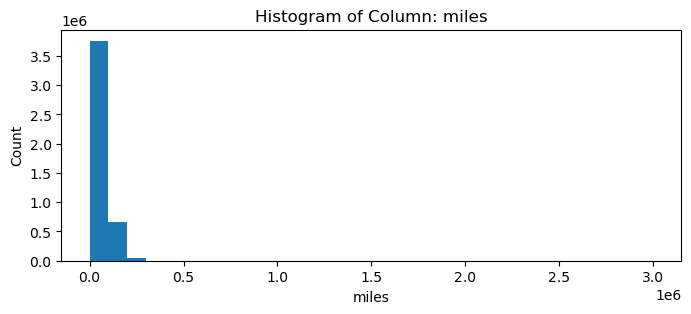

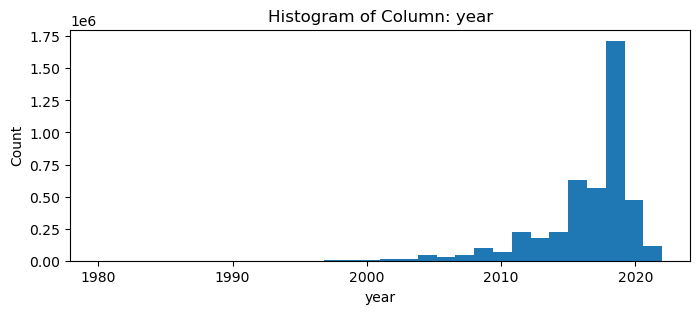

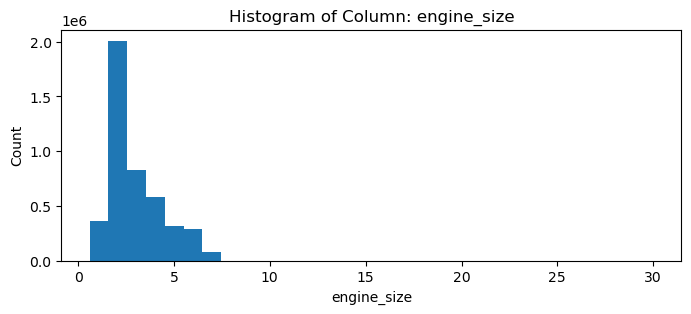

In [28]:
continuous_num_cols = ['miles', 'year', 'engine_size']

for num_col in continuous_num_cols:
    # Set up plot
    plt.figure(figsize=(8,3))

    # Plot
    plt.hist(encoded_df[num_col],bins = 30)
    
    # Title and Axis
    plt.title(f"Histogram of Column: {num_col}")
    plt.ylabel("Count")
    plt.xlabel(num_col)

    # Show plot
    plt.show()

Insight:
- For `miles` and `engine_size`, we can see that most of the data lie on the left. There may be some extreme large values on the right end.
- For `year`, as it is time-related, the used car listing count increased from time to time.
- For `year`, there is a huge drop after 2020. The possible reason could be the impact from COVID outbreak in 2020.

#### Replot for `miles` and `engine_size`
- Let's set the upper bound of `miles` plot to 250,000
- Let's set the upper bound of `engine_size` plot to 8

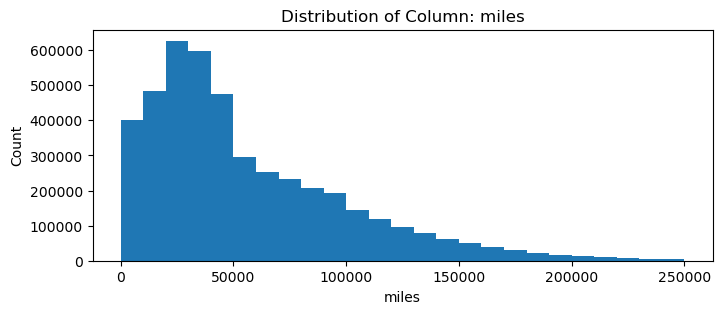

In [51]:
# Set up plot
plt.figure(figsize=(8,3))

# Plot Distribution
plt.hist(encoded_df[encoded_df["miles"]<=250000]["miles"],bins= 25)

# Title and Axis
plt.title(f"Distribution of Column: miles")
plt.ylabel("Count")
plt.xlabel("miles")

# Show plot
plt.show()

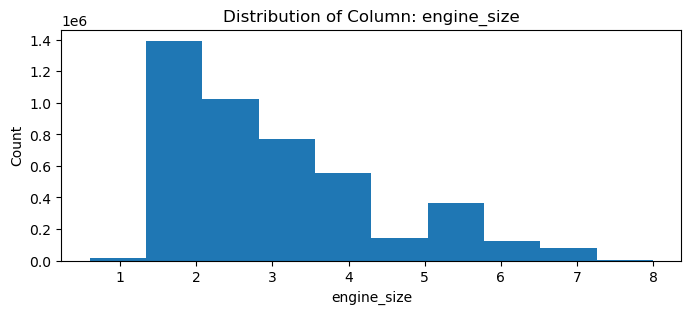

In [56]:
# Set up plot
plt.figure(figsize=(8,3))

# Plot Distribution
plt.hist(encoded_df[encoded_df["engine_size"]<=8]["engine_size"],bins= 10)

# Title and Axis
plt.title(f"Distribution of Column: engine_size")
plt.ylabel("Count")
plt.xlabel("engine_size")

# Show plot
plt.show()

Insight:
- Both `miles` and `engine_size` are right-skewed and tend to have a smaller value.

#### Bar Plot for `fuel_type`

In [85]:
fuel_tpye_col = ['fuel_CompressedNaturalGas', 'fuel_Biodiesel', 'fuel_E85',
       'fuel_Electric', 'fuel_Hydrogen', 'fuel_Lpg', 'fuel_PremiumUnleaded',
       'fuel_M85', 'fuel_Diesel', 'fuel_Unleaded']


In [93]:
fuel_col_count = encoded_df[fuel_tpye_col].sum(axis = 0).sort_values()
fuel_col_count

fuel_M85                           2
fuel_Lpg                           7
fuel_Hydrogen                    179
fuel_CompressedNaturalGas        299
fuel_Biodiesel                   542
fuel_Diesel                   110271
fuel_Electric                 119223
fuel_E85                      363216
fuel_PremiumUnleaded          983918
fuel_Unleaded                3358936
dtype: int64

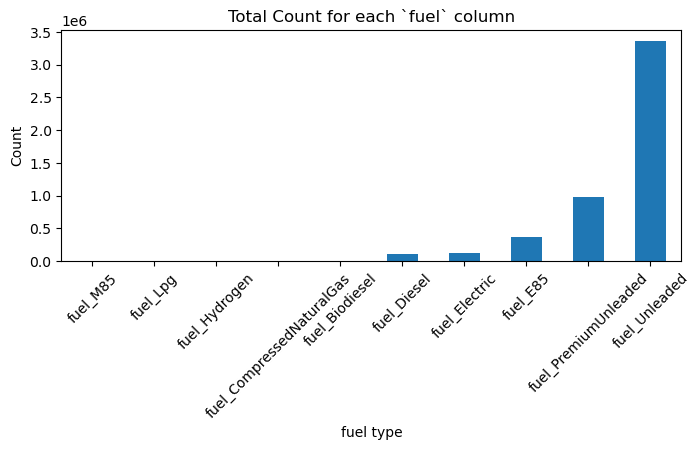

In [97]:
# Set up plot
plt.figure(figsize=(8,3))

# Plot
fuel_col_count.plot(kind="bar")

# Title and Axis
plt.title(f"Total Count for each `fuel` column")
plt.ylabel("Count")
plt.xlabel("fuel type")
plt.xticks(rotation = 45)

# Show plot
plt.show()

Note that:
- For one vehicle, it can be supported by different types of fuels, which means there could have more than one 1's in the same row in these columns.
- For the first five columns on the left, they are so few that not even shown in the bar plot. 
- For columns `M85` and `Lpg`, they have less than 10 occurrence. There will be many 0's in these columns, which may result in high correlation with each other. We may need to handle them properly before model fitting.
- The most popular fuel type are `Unleaded` and `PremiumUnleaded`.

---

### Univariate Analysis - Categorical

#### Columns with too many Distinct Values
- For those columns with too many distinct values

In [124]:
discrete_cols = ['make', 'model', 'trim', 'body_type',
                 'vehicle_type', 'drivetrain', 'transmission',
                 'engine_block', 'city', 'state', 'zip']
for dis_col in discrete_cols:
    distinct_val = set(encoded_df[dis_col])
    if len(distinct_val) > 50:
        print(f"Column: {dis_col} has {len(distinct_val)} distinct values")

Column: make has 63 distinct values
Column: model has 1252 distinct values
Column: trim has 2492 distinct values
Column: city has 6095 distinct values
Column: state has 68 distinct values
Column: zip has 13690 distinct values


- During the feature engineering stage, we will handle these categorical data with different encoding methods.
- In the following plots, we will only plot the top 100 values for these columns.

#### Barplot for Columns with over 50 distinct values


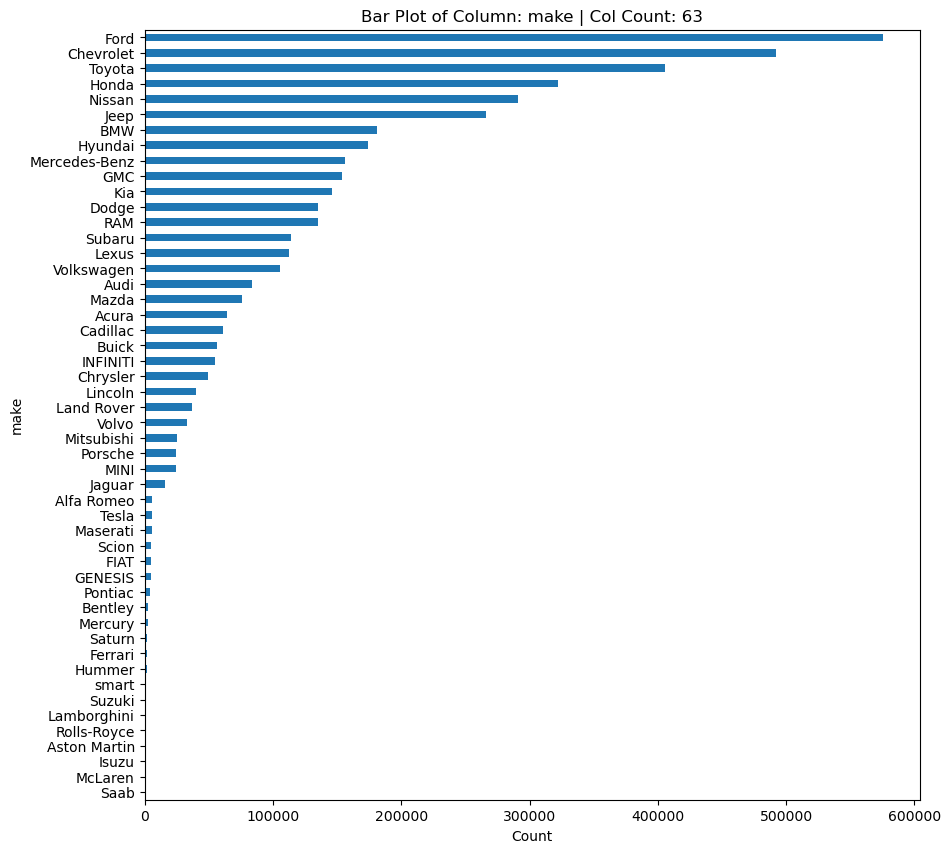

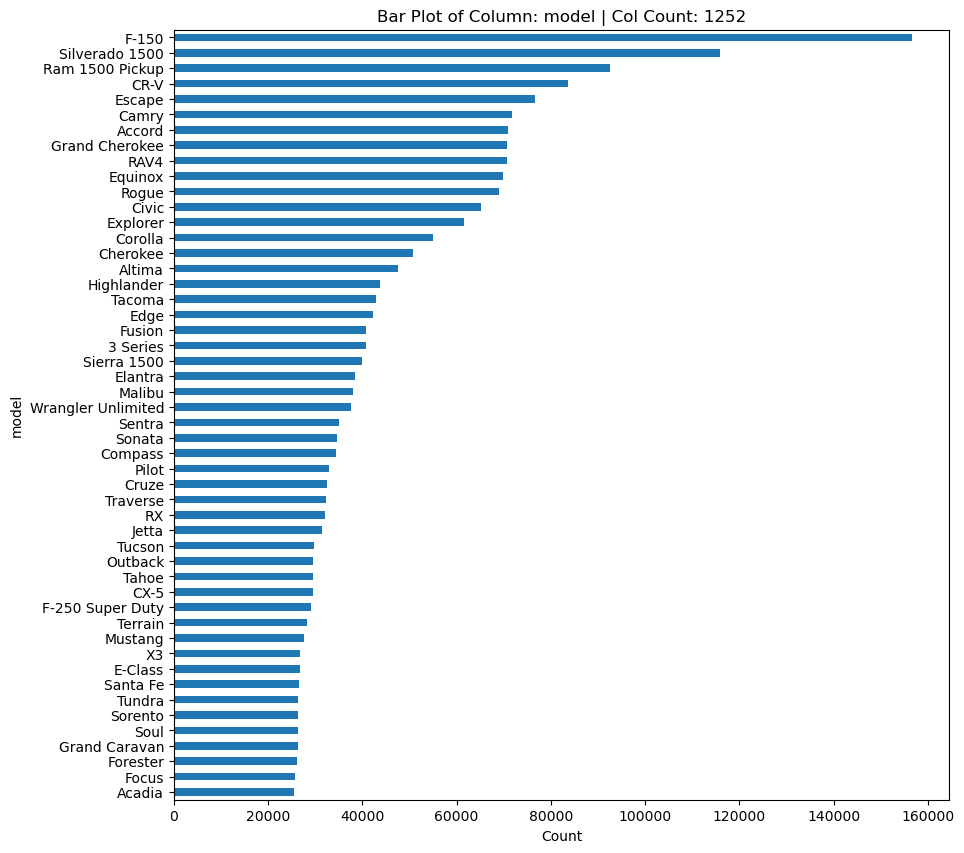

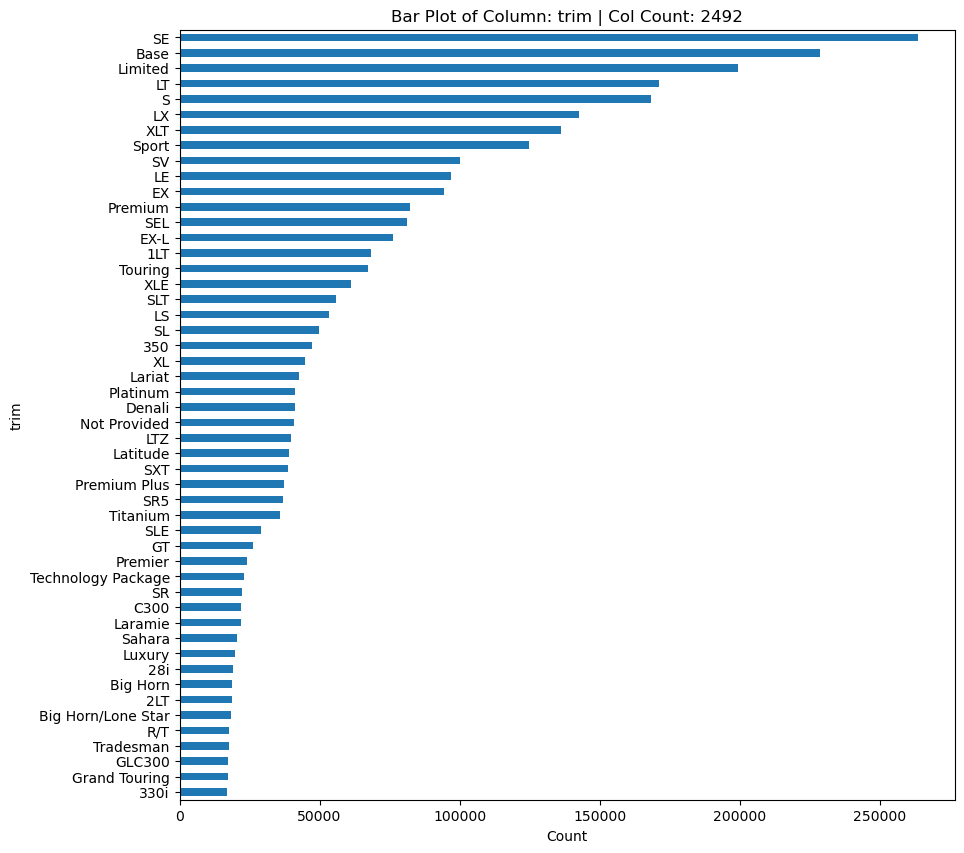

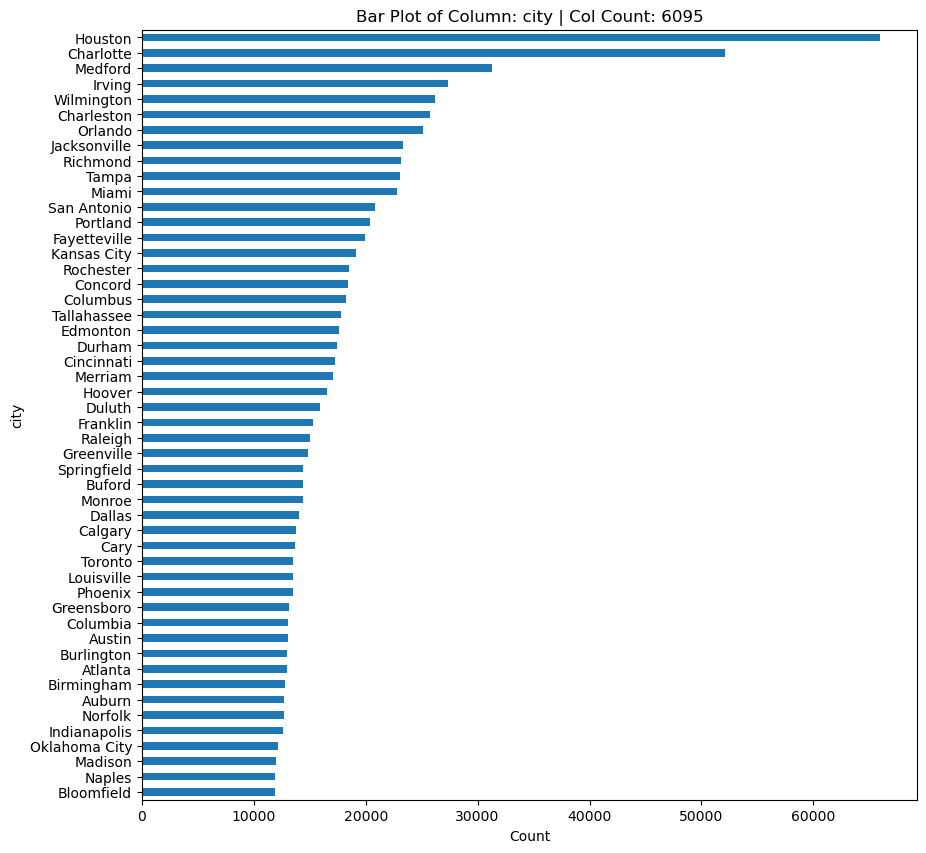

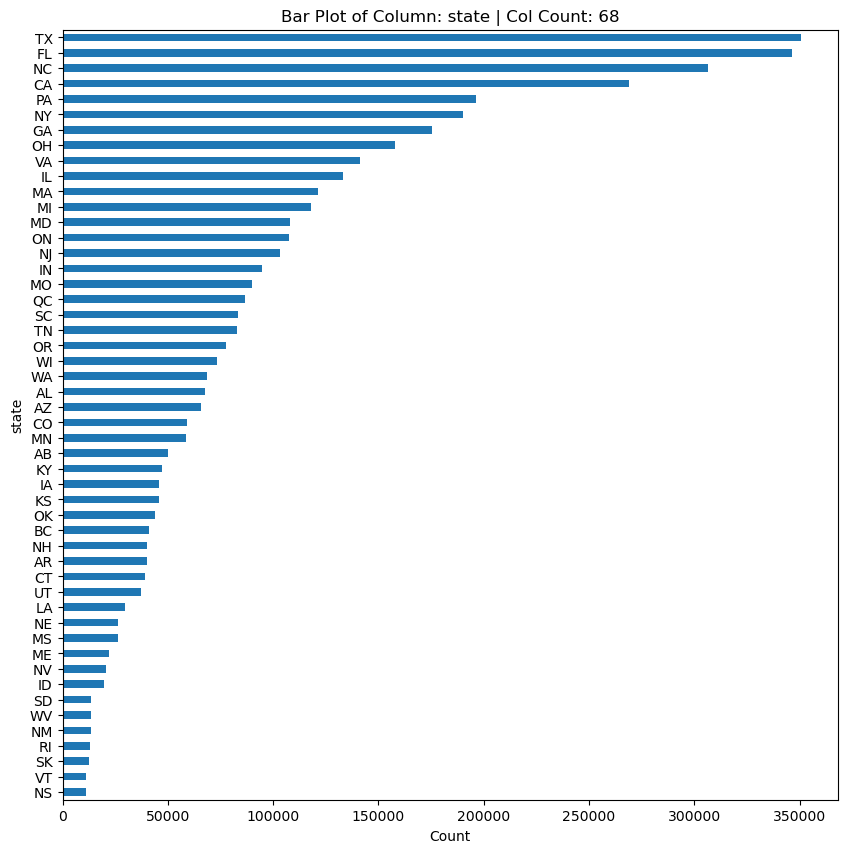

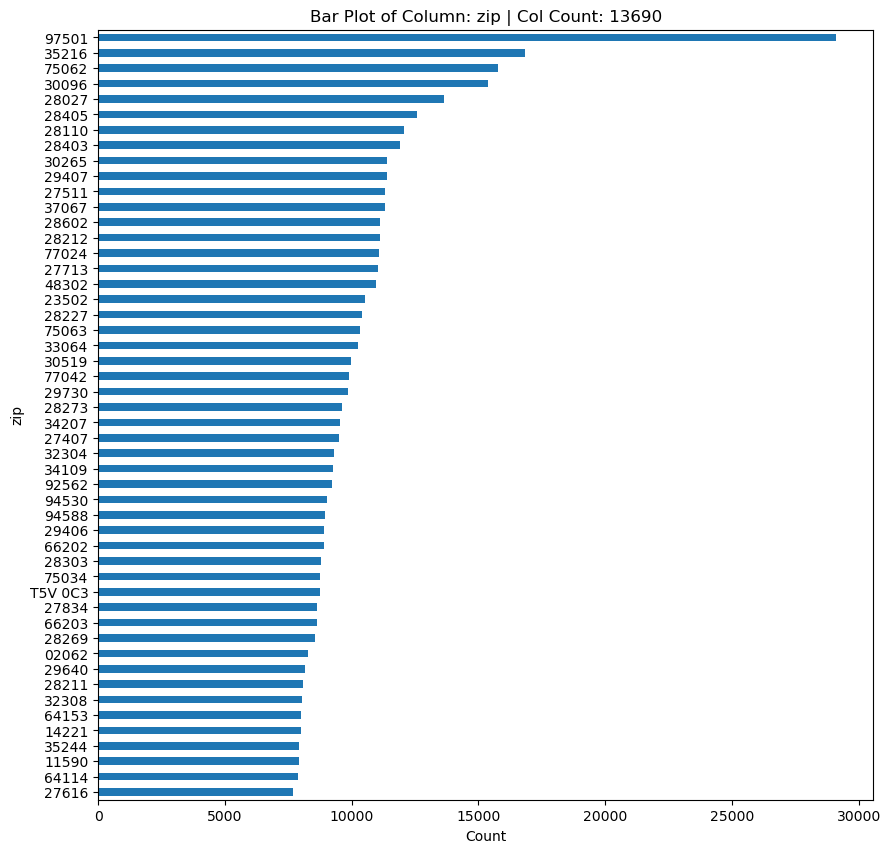

In [125]:
discrete_too_many_cols = ['make','model', 'trim', 'city','state', 'zip']
for dis_col in discrete_too_many_cols:
    # Set up plot
    plt.figure(figsize=(10,10))

    # Plot
    max_bar_count = 50
    val_count = encoded_df[dis_col].value_counts().sort_values(ascending = False)
    count = len(val_count.index)
    if count > max_bar_count:
        val_count[:max_bar_count].plot(kind = "barh")
    else:
        val_count.sort_values(ascending = False).plot(kind = "barh")

    # Title and Axis
    plt.title(f"Bar Plot of Column: {dis_col} | Col Count: {count}")
    plt.xlabel("Count")
    plt.ylabel(dis_col)
    
    # Show value in descending order
    plt.gca().invert_yaxis()

    # Show plot
    plt.show()

Note that:
- For these all 6 columns above, the top 100 categories has recognizable amount of data, which is good for the model to extract the information.
- However, the overwhelming amount of distinct values in these columns may expand our **feature space** drastically.
- For `make` and `state` there are less than 100 categories. We may still apply **dummy encoding** on it.
- However, for other columns, they have over 1000 or even 10000 distinct value. It may not possible to apply dummy encoding on it.  
We may need to further **group** them or apply other types of **encoding methods**. 

Let's move to other categorical columns.

#### Barplot for Columns with less then 50 distinct values

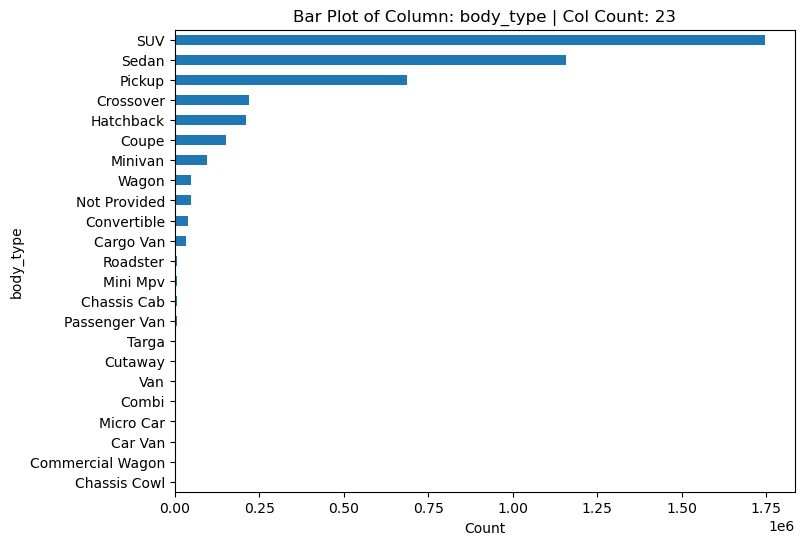

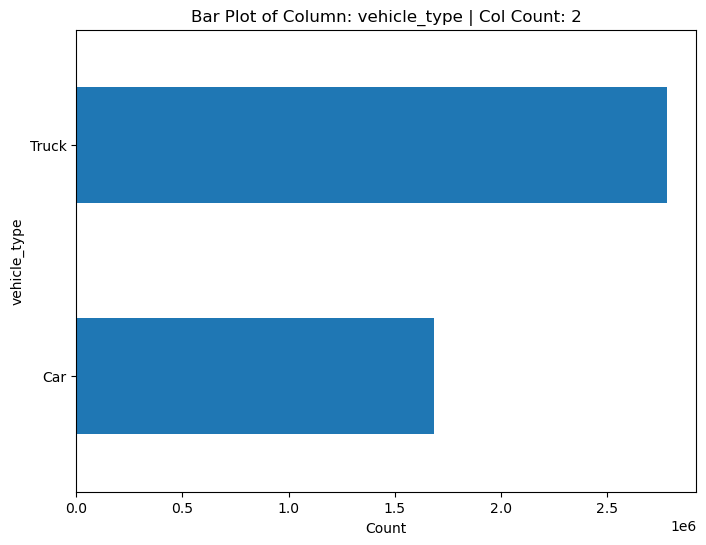

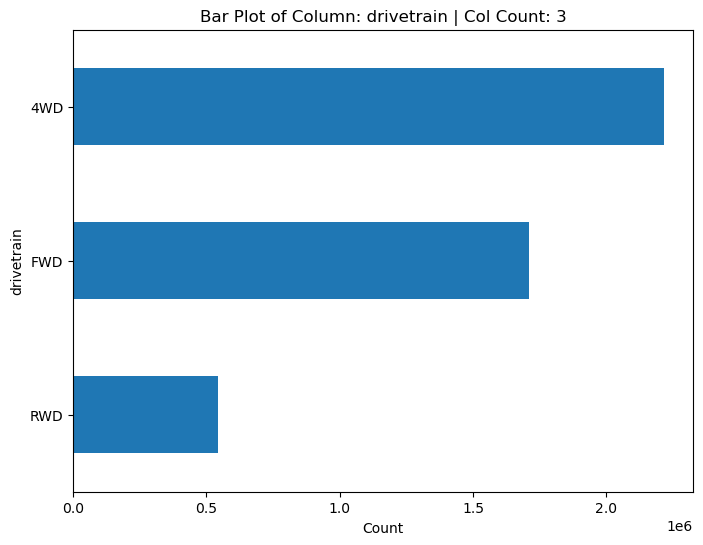

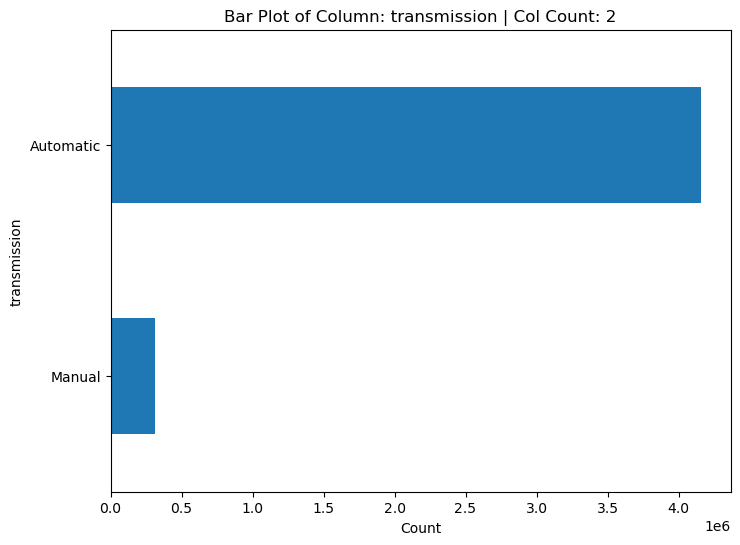

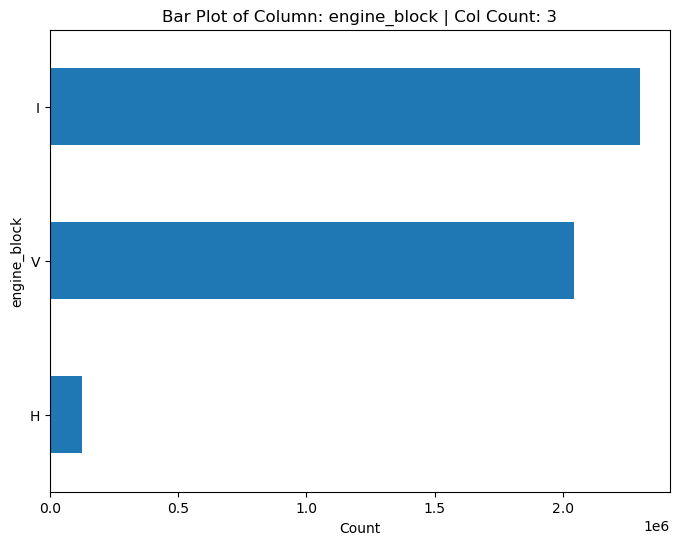

In [129]:
discrete_normal_cols = ['body_type', 'vehicle_type', 'drivetrain', 'transmission','engine_block']
for dis_col in discrete_normal_cols:
    # Set up plot
    plt.figure(figsize=(8,6))

    # Plot
    max_bar_count = 100
    val_count = encoded_df[dis_col].value_counts().sort_values(ascending = False)
    count = len(val_count.index)
    if count > max_bar_count:
        val_count[:max_bar_count].plot(kind = "barh")
    else:
        val_count.sort_values(ascending = False).plot(kind = "barh")

    # Title and Axis
    plt.title(f"Bar Plot of Column: {dis_col} | Col Count: {count}")
    plt.xlabel("Count")
    plt.ylabel(dis_col)
    
    # Show value in descending order
    plt.gca().invert_yaxis()

    # Show plot
    plt.show()

Insights: 
- For `body` column, we can see that there is a sharp cut between the value `Cargo Van` and `Roadster`. Perhaps this could be the cut off for dummy encoding.
- For `vehicle type` column, it is interesting that there are more `truck` vehicle type than `car` vehicle type. Maybe people in North America prefer to have a `truck` rather than a `car` for a larger loading capacity.
- For `drivetrain` column, we can see a comparable difference between all 3 types of drivetrain, but it is fine for our prediction.
- For `transmission` column, we can see that there are a lot of `automatic` transmission vehicle than `manual`.
- For `engine_block` column, we can see that most of the `engine_block` type are `I` or `V`. Maybe it is related to the vehicle `model` or the manufacturer (`make`). We may explore more in the bivariate analysis below.

---

### Bivariate Analysis - Numerical

#### Relationship between numerical & target

---

### Bivariate Analysis - Categorical

#### Relationship between categorical & target

---

### Hypothesis Testing